In [2]:
import sys
import os
sys.path.append(os.path.abspath('../'))

import pandas as pd
from scripts.data_clean import DataCleaner
from scripts.eda import EDAAnalyzer, FraudImbalanceAnalyzer
save_path = "../data/processed/processed_data.csv"

In [3]:
cleaner = DataCleaner()
    
print("--- Loading Data ---")
fraud_df = cleaner.load_data("../data/raw/Fraud_Data.csv")
ip_df = cleaner.load_data("../data/raw/IpAddress_to_Country.csv")


--- Loading Data ---


In [4]:
print(fraud_df.shape)
fraud_df.sample(5)

(151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
92936,176956,2015-08-01 14:22:04,2015-10-06 16:52:39,45,ELGHFORMZZNCB,Ads,Safari,M,39,6.366053e+08,0
144819,40250,2015-02-25 01:15:47,2015-05-07 14:47:47,24,DORLXGCZQDGRT,Ads,Chrome,M,26,1.777052e+09,0
43267,109518,2015-08-13 03:20:30,2015-11-17 22:54:18,44,ZPYDDKCWAYHIT,Direct,IE,F,30,4.123054e+09,0
54473,237669,2015-06-03 09:20:55,2015-09-27 02:55:35,49,MCCUWWZARCBET,SEO,IE,M,30,2.741828e+09,0
112580,287961,2015-07-07 13:08:12,2015-09-28 23:37:14,40,EZDWARESMYCTG,Direct,Safari,M,48,3.985367e+09,0


In [5]:
print(ip_df.shape)
ip_df.sample(5)

(138846, 3)


,lower_bound_ip_address,upper_bound_ip_address,country
86333,3.264905e+09,3264913407,Cyprus
74438,3.237340e+09,3237340415,Canada
25102,1.542329e+09,1542329343,Austria
82559,3.255660e+09,3255659775,Netherlands
71426,3.232481e+09,3232480767,United Kingdom


In [6]:
fraud_df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:
fraud_df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

remove duplicate
correct datatypes
handle missing values

In [8]:
print("--- Cleaning Data ---")
fraud_df = cleaner.handle_missing_values(fraud_df)
fraud_df = cleaner.remove_duplicates(fraud_df)
fraud_df = cleaner.correct_data_types(fraud_df)
    
   


--- Cleaning Data ---


eda

--- Geolocation Integration ---
--- Feature Engineering ---
--- Class Imbalance Analysis ---
📊 Class Imbalance Summary
-----------------------------------
Fraud / Default (1): 9.36%
Non-Fraud / Good (0): 90.64%
Imbalance Ratio (Non-Fraud : Fraud) = 9.7 : 1
--- Exploratory Data Analysis ---


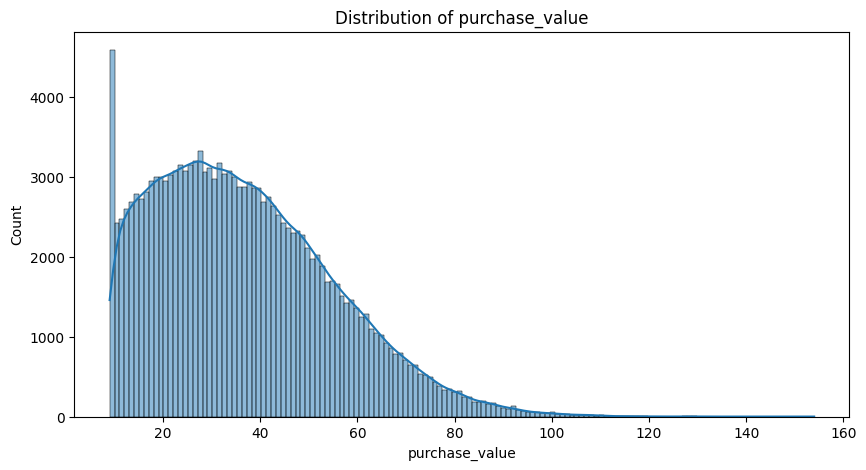

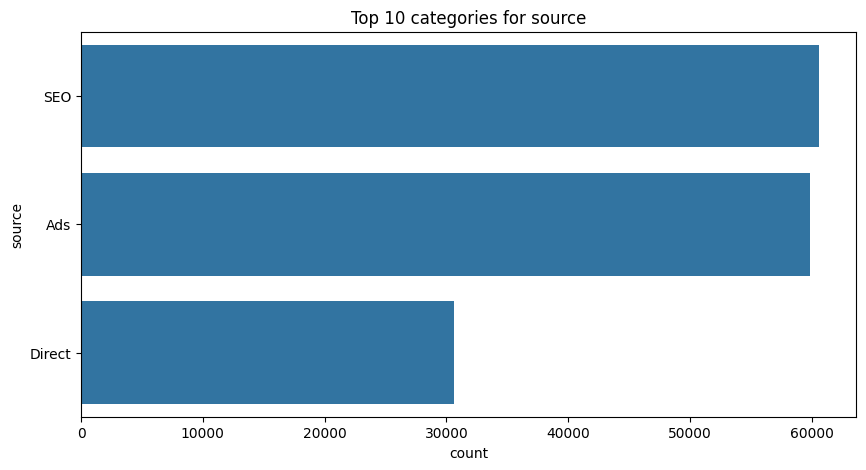

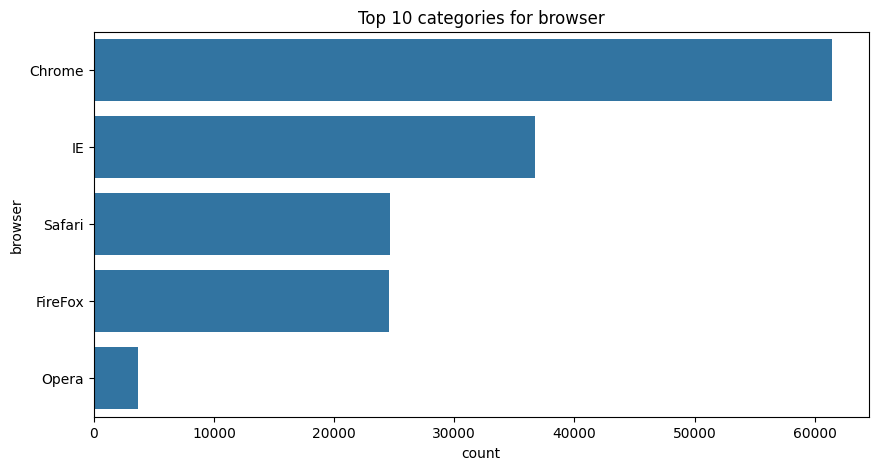

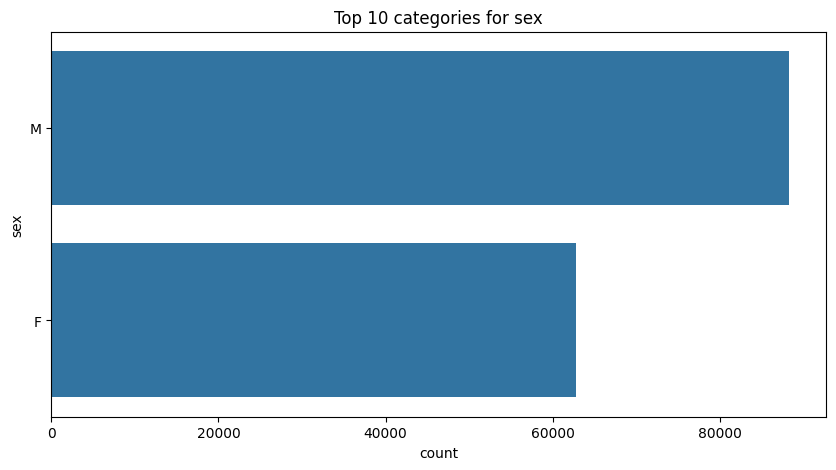

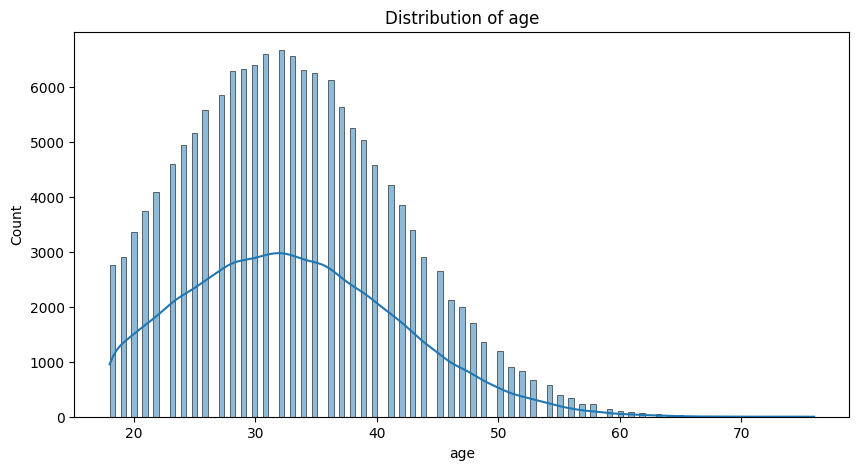

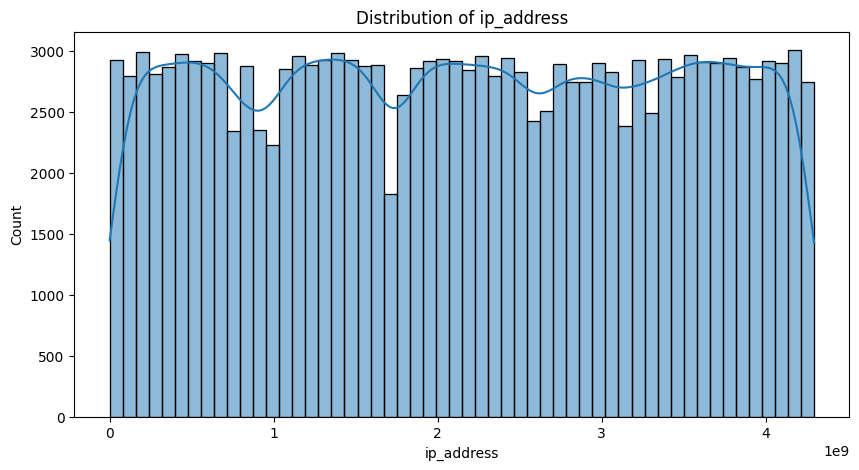

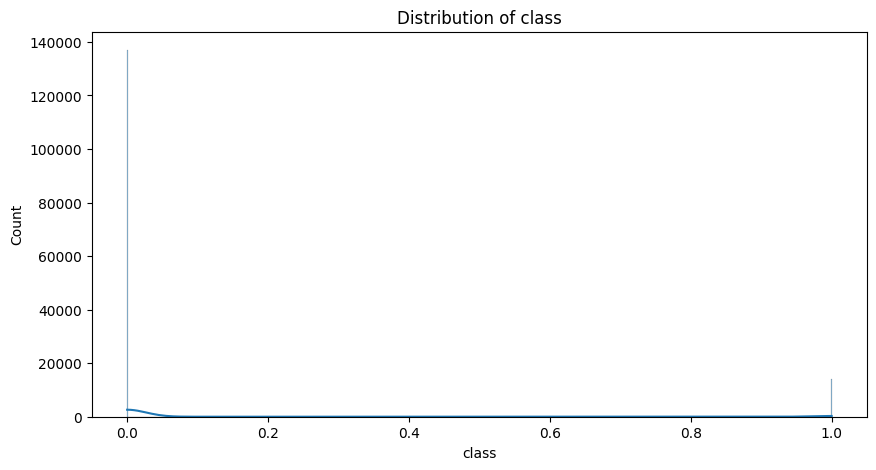

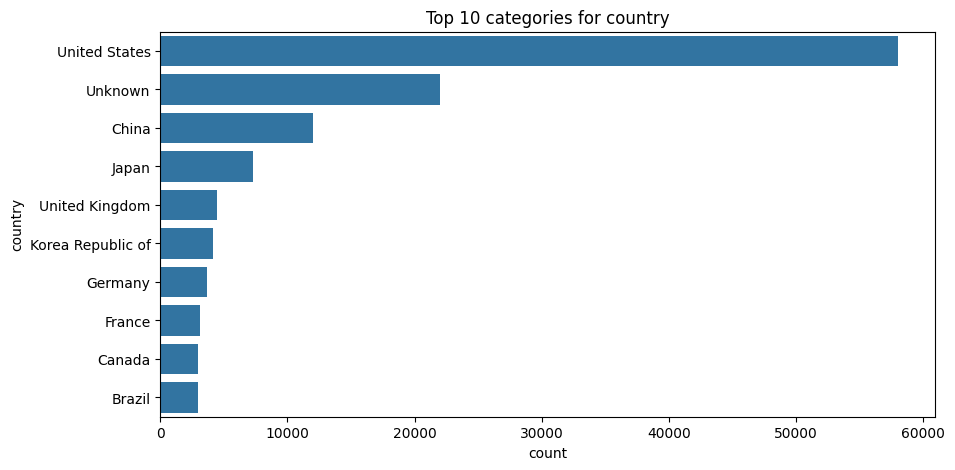

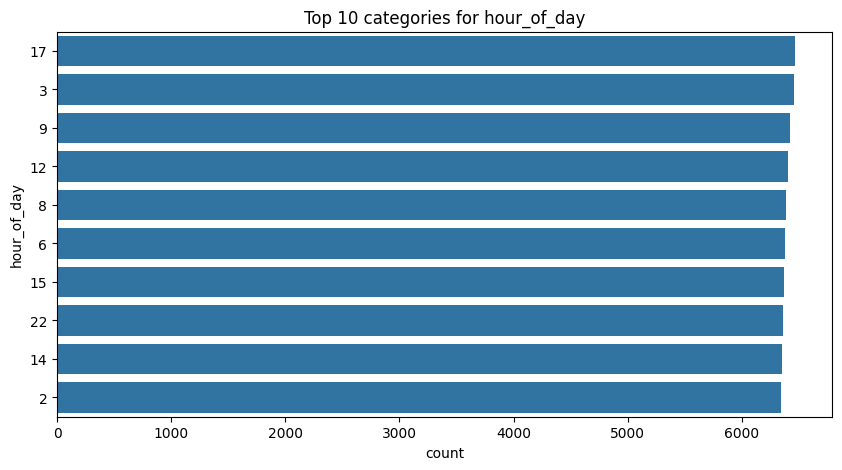

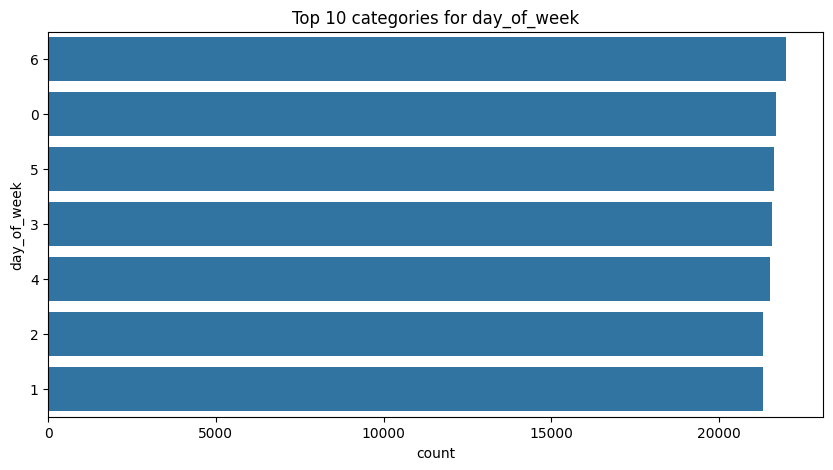

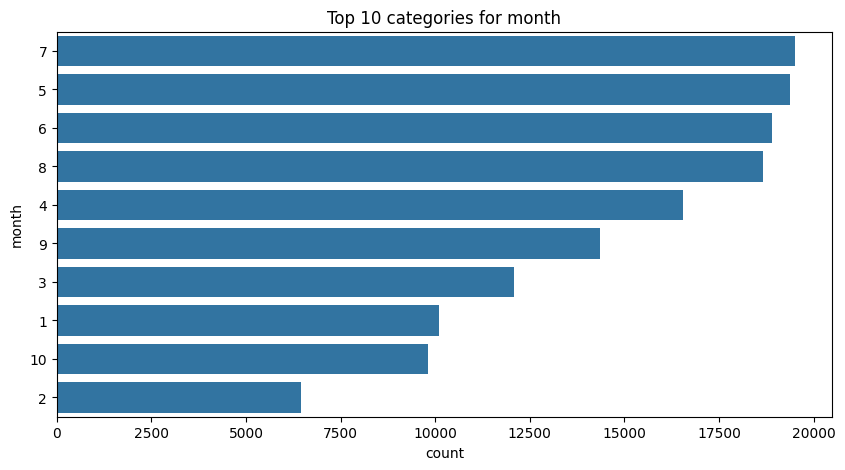

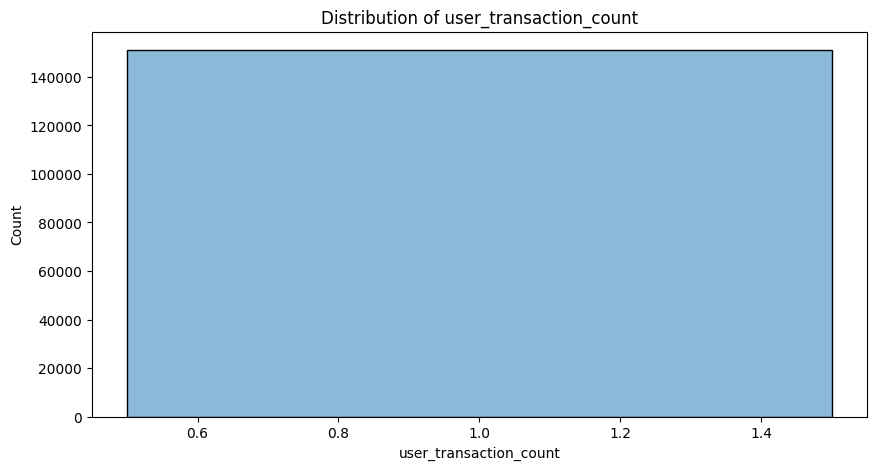

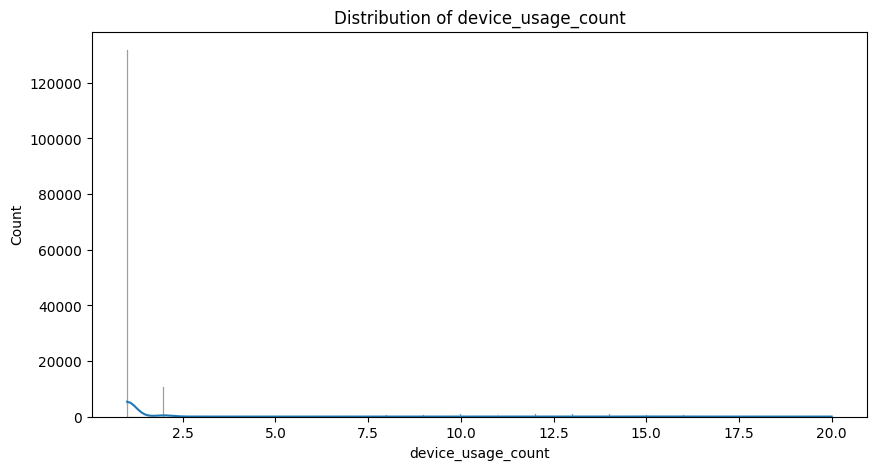

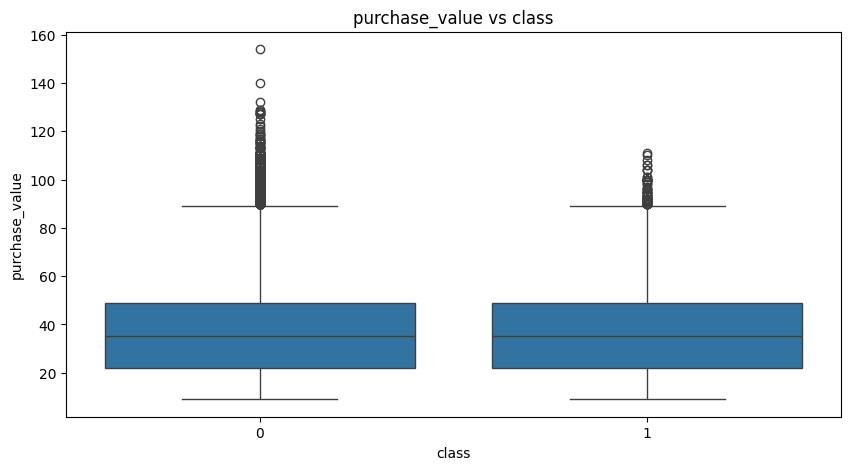

<Figure size 1000x500 with 0 Axes>

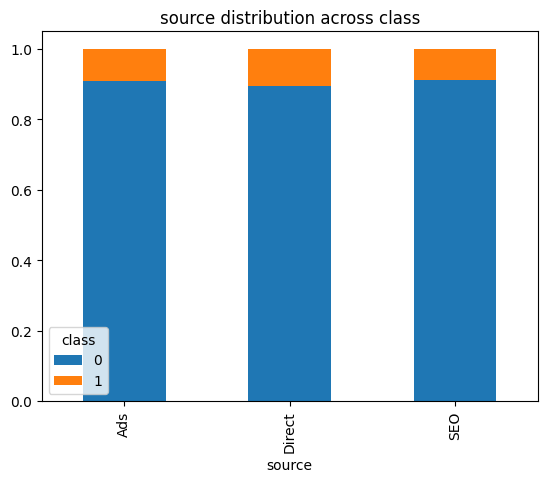

<Figure size 1000x500 with 0 Axes>

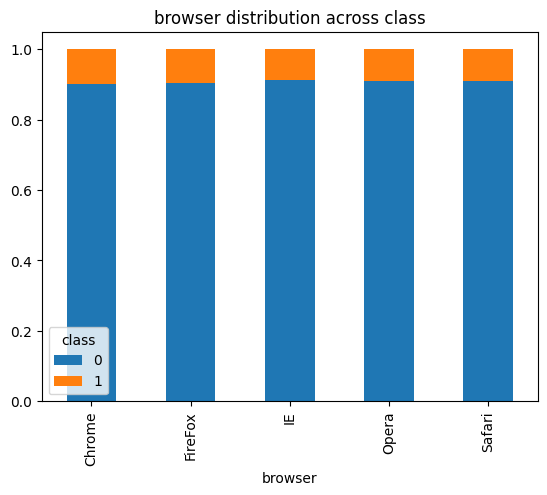

<Figure size 1000x500 with 0 Axes>

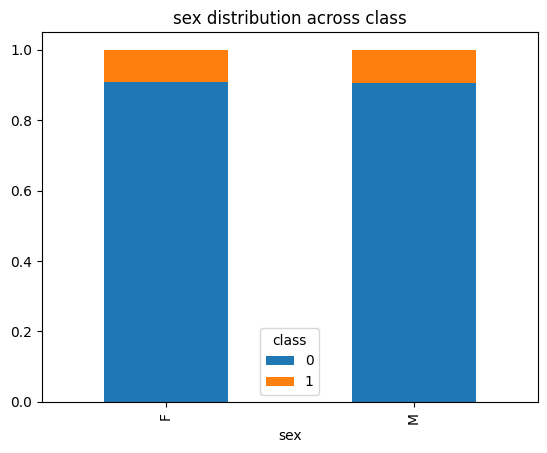

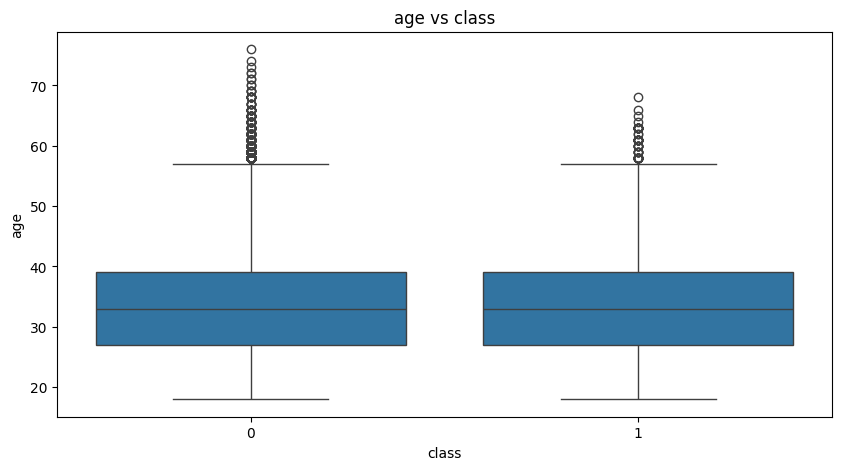

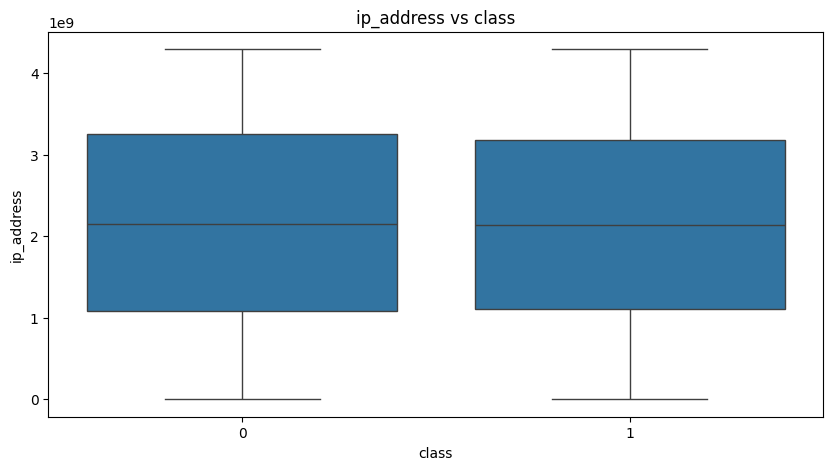

<Figure size 1000x500 with 0 Axes>

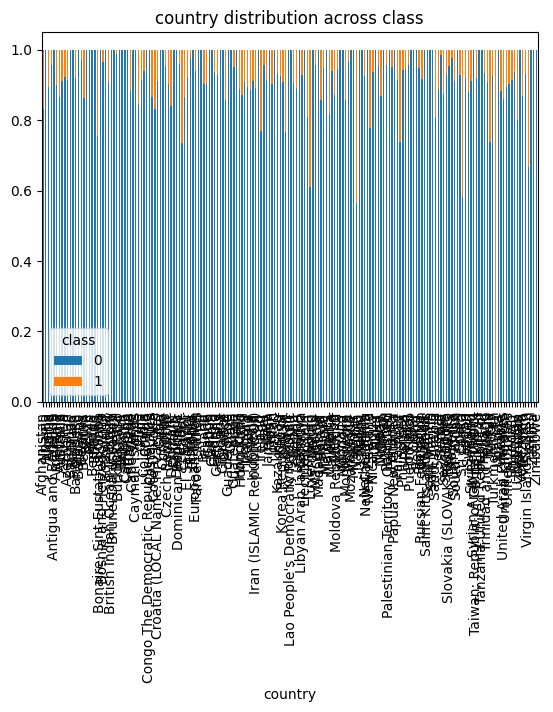

<Figure size 1000x500 with 0 Axes>

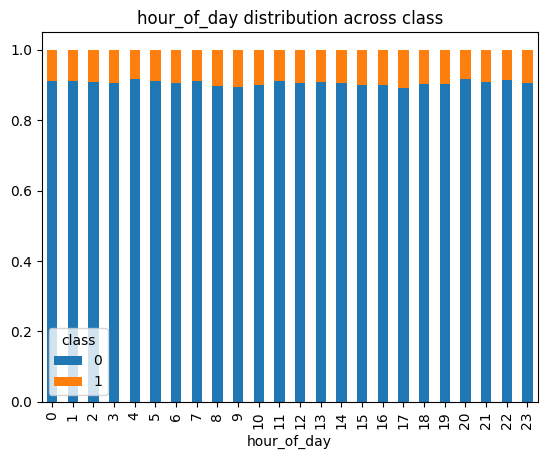

<Figure size 1000x500 with 0 Axes>

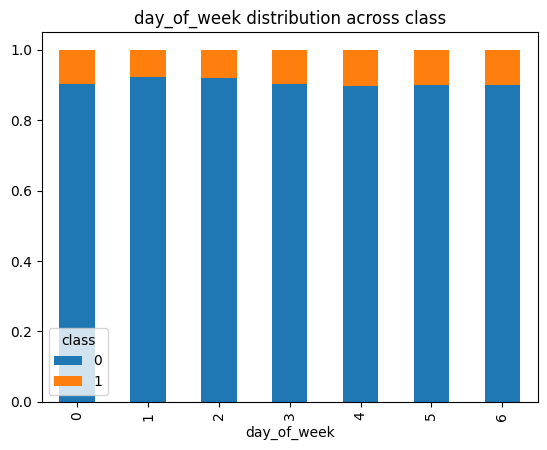

<Figure size 1000x500 with 0 Axes>

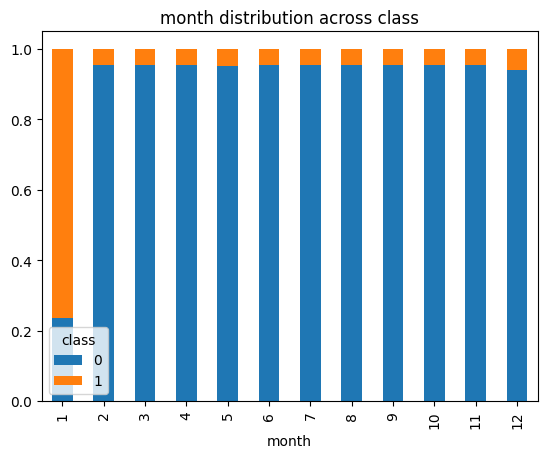

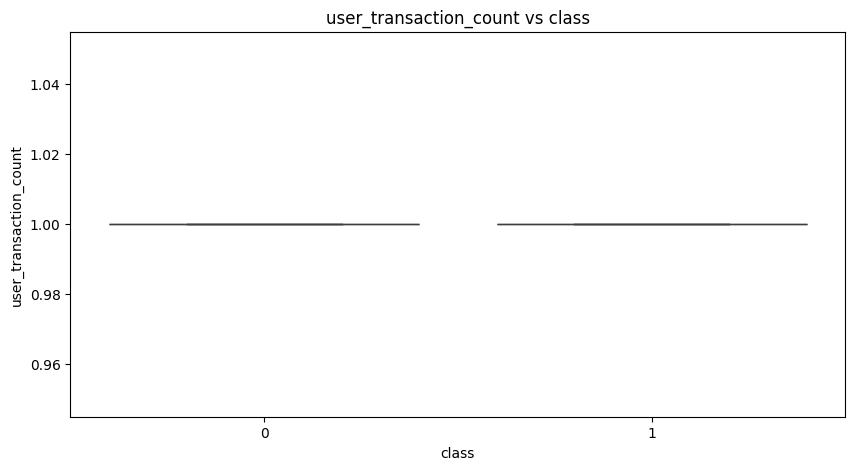

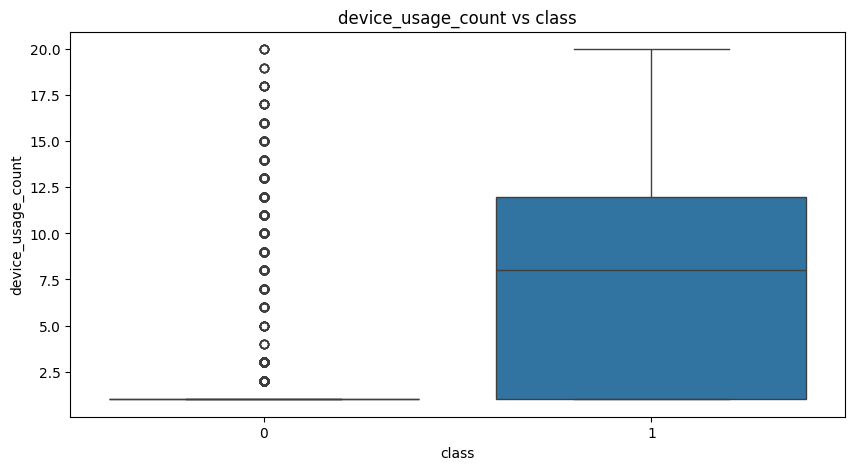

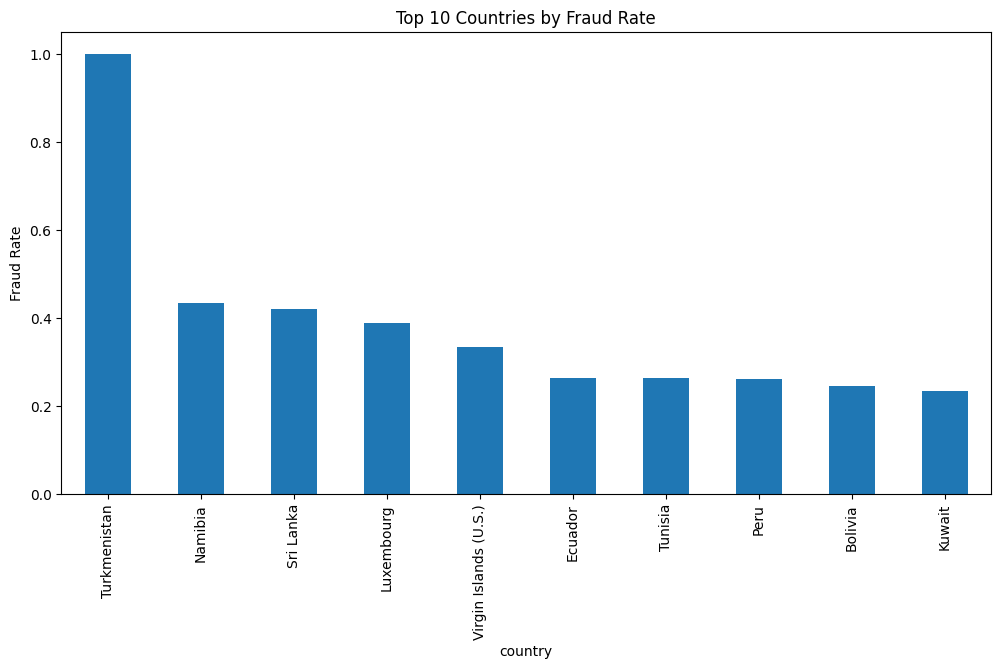

--- Data Transformation ---


In [9]:
print("--- Geolocation Integration ---")
merged_df = cleaner.merge_with_geo(fraud_df, ip_df)
    
print("--- Feature Engineering ---")
merged_df = cleaner.engineer_features(merged_df)
    
print("--- Class Imbalance Analysis ---")
analyzer = FraudImbalanceAnalyzer(merged_df, 'class')
analyzer.summary()
    
print("--- Exploratory Data Analysis ---")
eda = EDAAnalyzer(merged_df)
eda.univariate_analysis()
eda.bivariate_analysis()
eda.analyze_fraud_by_country()
    
print("--- Data Transformation ---")
numerical_cols = ['purchase_value', 'age', 'time_since_signup', 'user_transaction_count']
categorical_cols = ['source', 'browser', 'sex']
    
final_df = cleaner.transform_data(merged_df, categorical_cols=categorical_cols, numerical_cols=numerical_cols)
    


In [11]:
final_df=cleaner.prepare_for_modeling(final_df)
final_df.to_csv(save_path, index=False)
print(f"Intermediate data saved to: {save_path}")

Intermediate data saved to: ../data/processed/processed_data.csv
